In [1]:
import pandas as pd
print(pd.__version__)


2.2.3


All CSV files contain valid data.


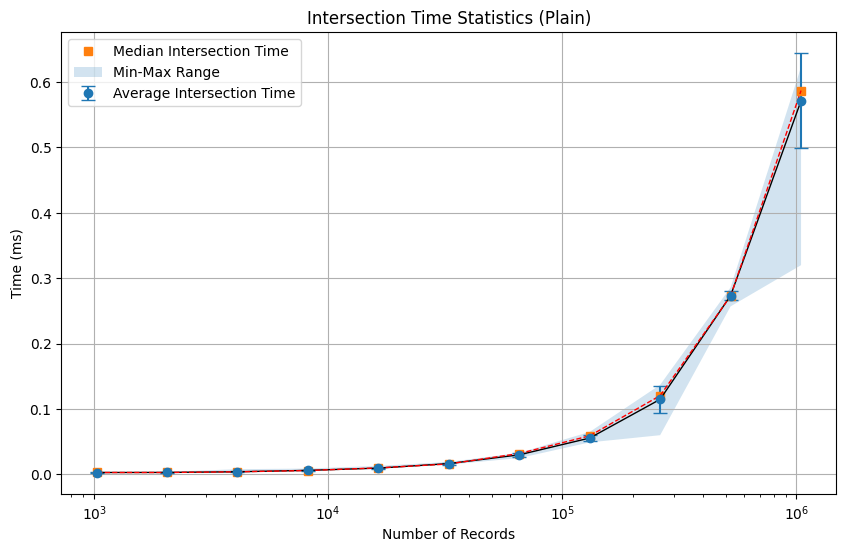

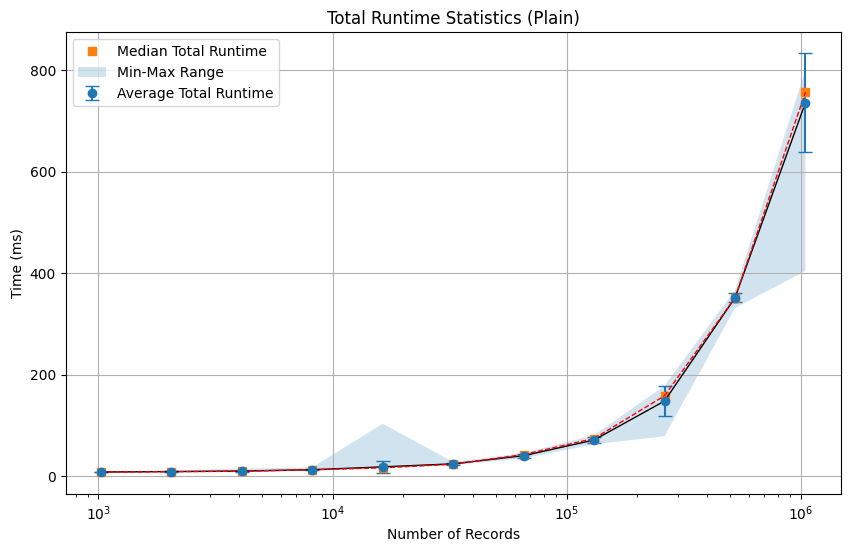

In [2]:
import numpy as np
import glob
import matplotlib.pyplot as plt

# Set the directory where your CSV files are located.
csv_dir = "/Users/nirajankoirala/Desktop/SGX-Biometrics-Privacy/PP_record_linkage/data/"
csv_pattern = csv_dir + "sender_results_*.csv"

# Get a sorted list of CSV files matching the pattern
csv_files = sorted(glob.glob(csv_pattern))

# Check for empty or malformed CSV files
empty_files = []
valid_files = []

for file in csv_files:
    try:
        df = pd.read_csv(file)
        if df.empty:
            empty_files.append(file)
        else:
            valid_files.append(file)
    except Exception as e:
        print(f"Error reading {file}: {e}")
        empty_files.append(file)

if empty_files:
    print("Warning: The following CSV files are empty or have issues:")
    for f in empty_files:
        print(f" - {f}")
else:
    print("All CSV files contain valid data.")

# Initialize lists to store the number of records and computed statistics
num_records = []  # extracted from filename

# For intersection_time statistics:
intersection_avg    = []
intersection_min    = []
intersection_max    = []
intersection_std    = []
intersection_median = []

# For total_runtime statistics:
total_avg    = []
total_min    = []
total_max    = []
total_std    = []
total_median = []

# Process each valid CSV file
for file in valid_files:
    df = pd.read_csv(file)
    
    # Ensure the required columns exist
    required_columns = {"intersection_time", "total_runtime"}
    if not required_columns.issubset(df.columns):
        print(f"Skipping {file} - Missing required columns.")
        continue

    # Extract the number of records from the filename.
    # For example, "sender_results_1024.csv" will yield 1024.
    try:
        num = int(file.split("_")[-1].split(".")[0])
        num_records.append(num)
    except ValueError:
        print(f"Skipping {file} - Could not extract record number.")
        continue

    # Compute statistics for intersection_time
    itime = df["intersection_time"]
    intersection_avg.append(itime.mean())
    intersection_min.append(itime.min())
    intersection_max.append(itime.max())
    intersection_std.append(itime.std())
    intersection_median.append(itime.median())

    # Compute statistics for total_runtime
    truntime = df["total_runtime"]
    total_avg.append(truntime.mean())
    total_min.append(truntime.min())
    total_max.append(truntime.max())
    total_std.append(truntime.std())
    total_median.append(truntime.median())

# If desired, sort all lists by num_records so the trend is clear.
# (This step is optional if your valid_files are already sorted numerically.)
sorted_data = sorted(zip(num_records, intersection_avg, intersection_min, intersection_max,
                           intersection_std, intersection_median, total_avg, total_min, total_max,
                           total_std, total_median), key=lambda x: x[0])
(num_records, 
 intersection_avg, intersection_min, intersection_max, intersection_std, intersection_median, 
 total_avg, total_min, total_max, total_std, total_median) = map(list, zip(*sorted_data))

# ----------------------------
# Plot Intersection Time Statistics
# ----------------------------
plt.figure(figsize=(10, 6))

# Plot average intersection time with markers and error bars (no automatic connecting line)
plt.errorbar(num_records, intersection_avg, yerr=intersection_std, fmt='o', capsize=5,
             label='Average Intersection Time')

# Plot median values as markers (without connecting lines)
plt.plot(num_records, intersection_median, 's', label='Median Intersection Time')

# Draw line segments connecting each pair of adjacent points.
for i in range(len(num_records) - 1):
    # Connect average values with a solid line (you can adjust the style if desired)
    plt.plot(num_records[i:i+2], intersection_avg[i:i+2], 'k-', lw=1)
    # Optionally, also connect the median markers with a dashed line:
    plt.plot(num_records[i:i+2], intersection_median[i:i+2], 'r--', lw=1)

# Shade the area between the minimum and maximum values
plt.fill_between(num_records, intersection_min, intersection_max, alpha=0.2,
                 label='Min-Max Range')

plt.xscale('log')  # Use logarithmic scale if record counts vary widely
plt.xlabel('Number of Records')
plt.ylabel('Time (ms)')
plt.title('Intersection Time Statistics (Plain)')
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------
# Plot Total Runtime Statistics
# ----------------------------
plt.figure(figsize=(10, 6))

# Plot average total runtime with markers and error bars
plt.errorbar(num_records, total_avg, yerr=total_std, fmt='o', capsize=5,
             label='Average Total Runtime')

# Plot median total runtime as markers
plt.plot(num_records, total_median, 's', label='Median Total Runtime')

# Draw line segments connecting adjacent points
for i in range(len(num_records) - 1):
    plt.plot(num_records[i:i+2], total_avg[i:i+2], 'k-', lw=1)
    plt.plot(num_records[i:i+2], total_median[i:i+2], 'r--', lw=1)

# Shade the area between the minimum and maximum values
plt.fill_between(num_records, total_min, total_max, alpha=0.2, label='Min-Max Range')

plt.xscale('log')
plt.xlabel('Number of Records')
plt.ylabel('Time (ms)')
plt.title('Total Runtime Statistics (Plain)')
plt.legend()
plt.grid(True)
plt.show()


All CSV files contain valid data.


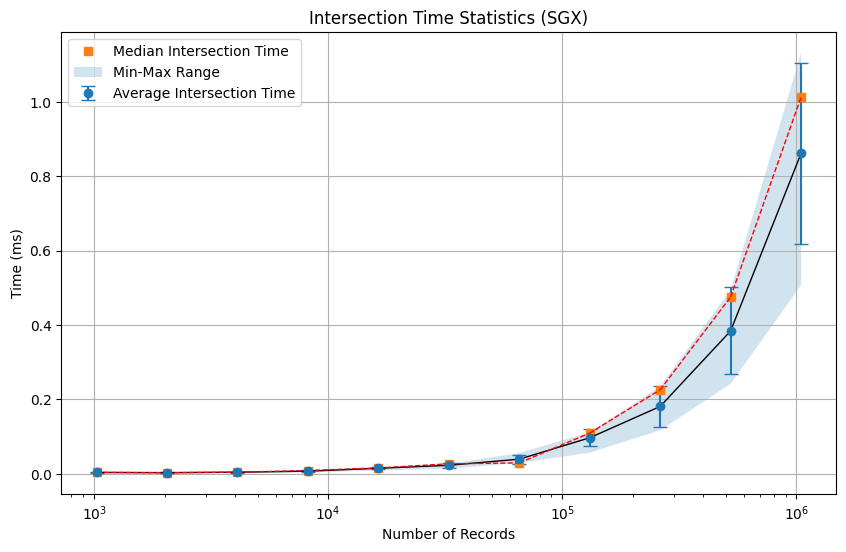

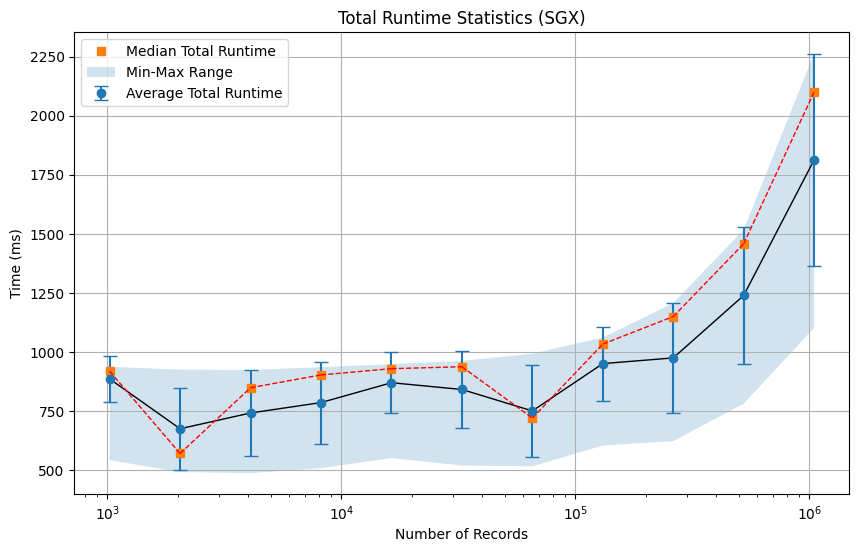

In [3]:
# Plot for SGX

# Set the directory where your CSV files are located.
csv_dir = "/Users/nirajankoirala/Desktop/SGX-Biometrics-Privacy/PP_record_linkage/data/sgx/"
csv_pattern = csv_dir + "sender_results_*.csv"

# Get a sorted list of CSV files matching the pattern
csv_files = sorted(glob.glob(csv_pattern))

# Check for empty or malformed CSV files
empty_files = []
valid_files = []

for file in csv_files:
    try:
        df = pd.read_csv(file)
        if df.empty:
            empty_files.append(file)
        else:
            valid_files.append(file)
    except Exception as e:
        print(f"Error reading {file}: {e}")
        empty_files.append(file)

if empty_files:
    print("Warning: The following CSV files are empty or have issues:")
    for f in empty_files:
        print(f" - {f}")
else:
    print("All CSV files contain valid data.")

# Initialize lists to store the number of records and computed statistics
num_records = []  # extracted from filename

# For intersection_time statistics:
intersection_avg    = []
intersection_min    = []
intersection_max    = []
intersection_std    = []
intersection_median = []

# For total_runtime statistics:
total_avg    = []
total_min    = []
total_max    = []
total_std    = []
total_median = []

# Process each valid CSV file
for file in valid_files:
    df = pd.read_csv(file)
    
    # Ensure the required columns exist
    required_columns = {"intersection_time", "total_runtime"}
    if not required_columns.issubset(df.columns):
        print(f"Skipping {file} - Missing required columns.")
        continue

    # Extract the number of records from the filename.
    # For example, "sender_results_1024.csv" will yield 1024.
    try:
        num = int(file.split("_")[-1].split(".")[0])
        num_records.append(num)
    except ValueError:
        print(f"Skipping {file} - Could not extract record number.")
        continue

    # Compute statistics for intersection_time
    itime = df["intersection_time"]
    intersection_avg.append(itime.mean())
    intersection_min.append(itime.min())
    intersection_max.append(itime.max())
    intersection_std.append(itime.std())
    intersection_median.append(itime.median())

    # Compute statistics for total_runtime
    truntime = df["total_runtime"]
    total_avg.append(truntime.mean())
    total_min.append(truntime.min())
    total_max.append(truntime.max())
    total_std.append(truntime.std())
    total_median.append(truntime.median())

# If desired, sort all lists by num_records so the trend is clear.
# (This step is optional if your valid_files are already sorted numerically.)
sorted_data = sorted(zip(num_records, intersection_avg, intersection_min, intersection_max,
                           intersection_std, intersection_median, total_avg, total_min, total_max,
                           total_std, total_median), key=lambda x: x[0])
(num_records, 
 intersection_avg, intersection_min, intersection_max, intersection_std, intersection_median, 
 total_avg, total_min, total_max, total_std, total_median) = map(list, zip(*sorted_data))

# ----------------------------
# Plot Intersection Time Statistics
# ----------------------------
plt.figure(figsize=(10, 6))

# Plot average intersection time with markers and error bars (no automatic connecting line)
plt.errorbar(num_records, intersection_avg, yerr=intersection_std, fmt='o', capsize=5,
             label='Average Intersection Time')

# Plot median values as markers (without connecting lines)
plt.plot(num_records, intersection_median, 's', label='Median Intersection Time')

# Draw line segments connecting each pair of adjacent points.
for i in range(len(num_records) - 1):
    # Connect average values with a solid line (you can adjust the style if desired)
    plt.plot(num_records[i:i+2], intersection_avg[i:i+2], 'k-', lw=1)
    # Optionally, also connect the median markers with a dashed line:
    plt.plot(num_records[i:i+2], intersection_median[i:i+2], 'r--', lw=1)

# Shade the area between the minimum and maximum values
plt.fill_between(num_records, intersection_min, intersection_max, alpha=0.2,
                 label='Min-Max Range')

plt.xscale('log')  # Use logarithmic scale if record counts vary widely
plt.xlabel('Number of Records')
plt.ylabel('Time (ms)')
plt.title('Intersection Time Statistics (SGX)')
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------
# Plot Total Runtime Statistics
# ----------------------------
plt.figure(figsize=(10, 6))

# Plot average total runtime with markers and error bars
plt.errorbar(num_records, total_avg, yerr=total_std, fmt='o', capsize=5,
             label='Average Total Runtime')

# Plot median total runtime as markers
plt.plot(num_records, total_median, 's', label='Median Total Runtime')

# Draw line segments connecting adjacent points
for i in range(len(num_records) - 1):
    plt.plot(num_records[i:i+2], total_avg[i:i+2], 'k-', lw=1)
    plt.plot(num_records[i:i+2], total_median[i:i+2], 'r--', lw=1)

# Shade the area between the minimum and maximum values
plt.fill_between(num_records, total_min, total_max, alpha=0.2, label='Min-Max Range')

plt.xscale('log')
plt.xlabel('Number of Records')
plt.ylabel('Time (ms)')
plt.title('Total Runtime Statistics (SGX)')
plt.legend()
plt.grid(True)
plt.show()


All CSV files in /Users/nirajankoirala/Desktop/SGX-Biometrics-Privacy/PP_record_linkage/data/ contain valid data.
All CSV files in /Users/nirajankoirala/Desktop/SGX-Biometrics-Privacy/PP_record_linkage/data/sgx/ contain valid data.


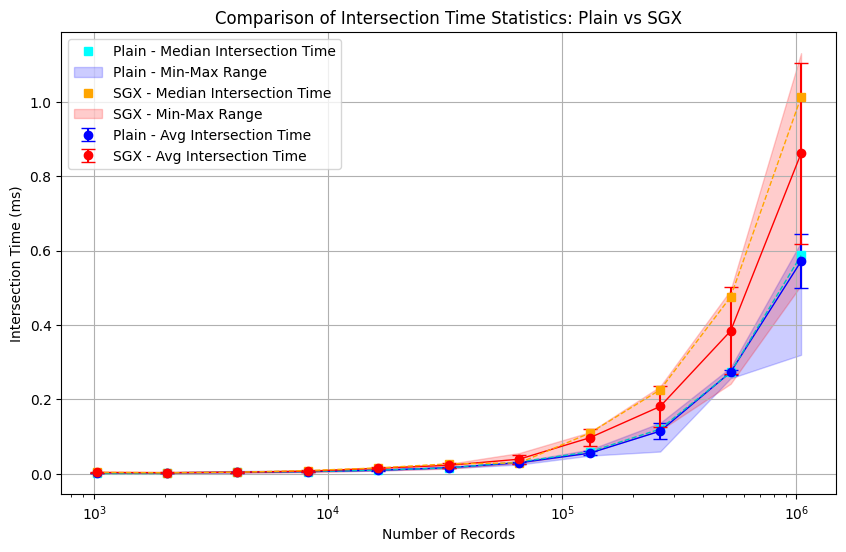

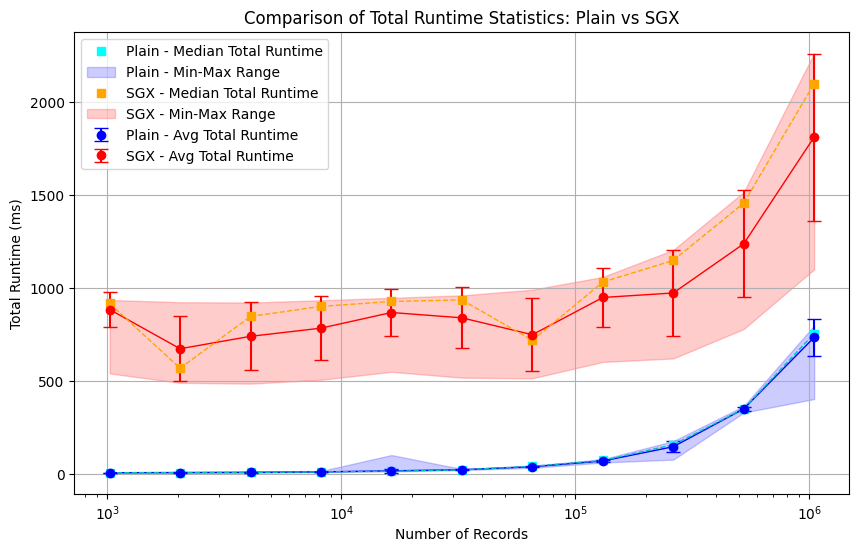

In [4]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt

def load_data(csv_dir):
    """
    Loads CSV files from the specified directory matching the pattern "sender_results_*.csv"
    and computes summary statistics for intersection_time and total_runtime.
    
    Returns a dictionary with the following keys:
      - num_records: list of record counts (extracted from the filename)
      - intersection_avg, intersection_min, intersection_max, intersection_std, intersection_median
      - total_avg, total_min, total_max, total_std, total_median
    """
    csv_pattern = csv_dir + "sender_results_*.csv"
    csv_files = sorted(glob.glob(csv_pattern))
    
    # Check for empty or malformed CSV files
    empty_files = []
    valid_files = []
    for file in csv_files:
        try:
            df = pd.read_csv(file)
            if df.empty:
                empty_files.append(file)
            else:
                valid_files.append(file)
        except Exception as e:
            print(f"Error reading {file}: {e}")
            empty_files.append(file)
    
    if empty_files:
        print("Warning: The following CSV files are empty or have issues:")
        for f in empty_files:
            print(f" - {f}")
    else:
        print("All CSV files in", csv_dir, "contain valid data.")
    
    # Initialize lists for the computed statistics
    num_records = []
    # Intersection time stats
    intersection_avg    = []
    intersection_min    = []
    intersection_max    = []
    intersection_std    = []
    intersection_median = []
    # Total runtime stats
    total_avg    = []
    total_min    = []
    total_max    = []
    total_std    = []
    total_median = []
    
    # Process each valid CSV file
    for file in valid_files:
        df = pd.read_csv(file)
        
        # Ensure the required columns exist
        required_columns = {"intersection_time", "total_runtime"}
        if not required_columns.issubset(df.columns):
            print(f"Skipping {file} - Missing required columns.")
            continue
        
        # Extract the number of records from the filename.
        # For example, "sender_results_1024.csv" will yield 1024.
        try:
            num = int(file.split("_")[-1].split(".")[0])
            num_records.append(num)
        except ValueError:
            print(f"Skipping {file} - Could not extract record number.")
            continue
        
        # Compute statistics for intersection_time
        itime = df["intersection_time"]
        intersection_avg.append(itime.mean())
        intersection_min.append(itime.min())
        intersection_max.append(itime.max())
        intersection_std.append(itime.std())
        intersection_median.append(itime.median())
        
        # Compute statistics for total_runtime
        truntime = df["total_runtime"]
        total_avg.append(truntime.mean())
        total_min.append(truntime.min())
        total_max.append(truntime.max())
        total_std.append(truntime.std())
        total_median.append(truntime.median())
    
    # Sort all lists by num_records (in case the files are not already in order)
    sorted_data = sorted(zip(num_records, intersection_avg, intersection_min, intersection_max,
                             intersection_std, intersection_median, total_avg, total_min, total_max,
                             total_std, total_median), key=lambda x: x[0])
    
    (num_records, 
     intersection_avg, intersection_min, intersection_max, intersection_std, intersection_median, 
     total_avg, total_min, total_max, total_std, total_median) = map(list, zip(*sorted_data))
    
    return {
        "num_records": num_records,
        "intersection_avg": intersection_avg,
        "intersection_min": intersection_min,
        "intersection_max": intersection_max,
        "intersection_std": intersection_std,
        "intersection_median": intersection_median,
        "total_avg": total_avg,
        "total_min": total_min,
        "total_max": total_max,
        "total_std": total_std,
        "total_median": total_median
    }

# Directories for plain and SGX CSV files
plain_dir = "/Users/nirajankoirala/Desktop/SGX-Biometrics-Privacy/PP_record_linkage/data/"
sgx_dir   = "/Users/nirajankoirala/Desktop/SGX-Biometrics-Privacy/PP_record_linkage/data/sgx/"

# Load data for both cases
plain_data = load_data(plain_dir)
sgx_data   = load_data(sgx_dir)

# ----------------------------
# Plot 1: Compare Intersection Time (Plain vs SGX)
# ----------------------------
plt.figure(figsize=(10, 6))

# Plain data: plot average with error bars, median markers, connecting lines, and a shaded min-max region.
plt.errorbar(plain_data["num_records"], plain_data["intersection_avg"], yerr=plain_data["intersection_std"],
             fmt='o', capsize=5, label='Plain - Avg Intersection Time', color='blue')
plt.plot(plain_data["num_records"], plain_data["intersection_median"], 's', label='Plain - Median Intersection Time', color='cyan')
for i in range(len(plain_data["num_records"]) - 1):
    plt.plot(plain_data["num_records"][i:i+2], plain_data["intersection_avg"][i:i+2], 'b-', lw=1)
    plt.plot(plain_data["num_records"][i:i+2], plain_data["intersection_median"][i:i+2], 'c--', lw=1)
plt.fill_between(plain_data["num_records"], plain_data["intersection_min"], plain_data["intersection_max"],
                 color='blue', alpha=0.2, label='Plain - Min-Max Range')

# SGX data: similar plot in different colors.
plt.errorbar(sgx_data["num_records"], sgx_data["intersection_avg"], yerr=sgx_data["intersection_std"],
             fmt='o', capsize=5, label='SGX - Avg Intersection Time', color='red')
plt.plot(sgx_data["num_records"], sgx_data["intersection_median"], 's', label='SGX - Median Intersection Time', color='orange')
for i in range(len(sgx_data["num_records"]) - 1):
    plt.plot(sgx_data["num_records"][i:i+2], sgx_data["intersection_avg"][i:i+2], 'r-', lw=1)
    plt.plot(sgx_data["num_records"][i:i+2], sgx_data["intersection_median"][i:i+2], color='orange', linestyle='--', lw=1)
plt.fill_between(sgx_data["num_records"], sgx_data["intersection_min"], sgx_data["intersection_max"],
                 color='red', alpha=0.2, label='SGX - Min-Max Range')

plt.xscale('log')  # Logarithmic scale if record counts vary widely
plt.xlabel('Number of Records')
plt.ylabel('Intersection Time (ms)')
plt.title('Comparison of Intersection Time Statistics: Plain vs SGX')
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------
# Plot 2: Compare Total Runtime (Plain vs SGX)
# ----------------------------
plt.figure(figsize=(10, 6))

# Plain data: plot average with error bars, median markers, connecting lines, and a shaded min-max region.
plt.errorbar(plain_data["num_records"], plain_data["total_avg"], yerr=plain_data["total_std"],
             fmt='o', capsize=5, label='Plain - Avg Total Runtime', color='blue')
plt.plot(plain_data["num_records"], plain_data["total_median"], 's', label='Plain - Median Total Runtime', color='cyan')
for i in range(len(plain_data["num_records"]) - 1):
    plt.plot(plain_data["num_records"][i:i+2], plain_data["total_avg"][i:i+2], 'b-', lw=1)
    plt.plot(plain_data["num_records"][i:i+2], plain_data["total_median"][i:i+2], 'c--', lw=1)
plt.fill_between(plain_data["num_records"], plain_data["total_min"], plain_data["total_max"],
                 color='blue', alpha=0.2, label='Plain - Min-Max Range')

# SGX data: similar plot in different colors.
plt.errorbar(sgx_data["num_records"], sgx_data["total_avg"], yerr=sgx_data["total_std"],
             fmt='o', capsize=5, label='SGX - Avg Total Runtime', color='red')
plt.plot(sgx_data["num_records"], sgx_data["total_median"], 's', label='SGX - Median Total Runtime', color='orange')
for i in range(len(sgx_data["num_records"]) - 1):
    plt.plot(sgx_data["num_records"][i:i+2], sgx_data["total_avg"][i:i+2], 'r-', lw=1)
    plt.plot(sgx_data["num_records"][i:i+2], sgx_data["total_median"][i:i+2], color='orange', linestyle='--', lw=1)
plt.fill_between(sgx_data["num_records"], sgx_data["total_min"], sgx_data["total_max"],
                 color='red', alpha=0.2, label='SGX - Min-Max Range')

plt.xscale('log')
plt.xlabel('Number of Records')
plt.ylabel('Total Runtime (ms)')
plt.title('Comparison of Total Runtime Statistics: Plain vs SGX')
plt.legend()
plt.grid(True)
plt.show()


All CSV files in /Users/nirajankoirala/Desktop/SGX-Biometrics-Privacy/PP_record_linkage/data/ contain valid data.
All CSV files in /Users/nirajankoirala/Desktop/SGX-Biometrics-Privacy/PP_record_linkage/data/sgx/ contain valid data.


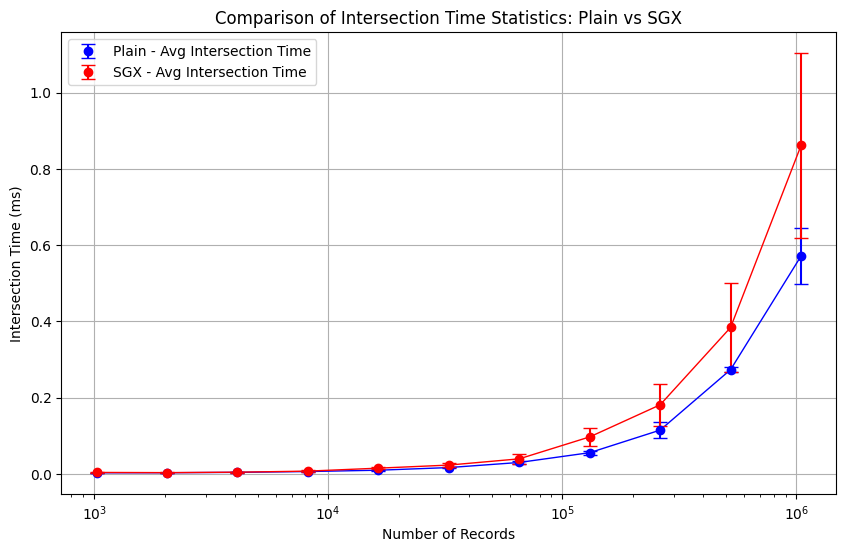

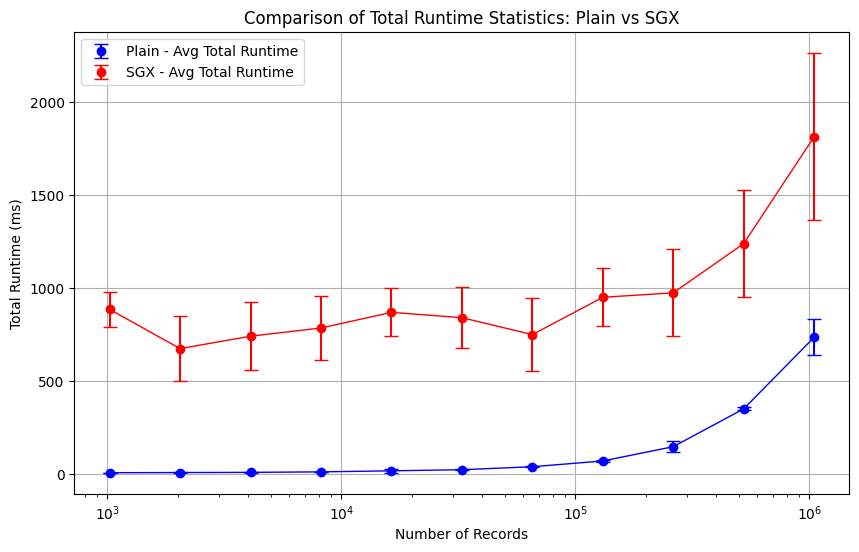

In [6]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt

def load_data(csv_dir):
    """
    Loads CSV files from the specified directory matching the pattern "sender_results_*.csv"
    and computes summary statistics for intersection_time and total_runtime.
    
    Returns a dictionary with the following keys:
      - num_records: list of record counts (extracted from the filename)
      - intersection_avg, intersection_std
      - total_avg, total_std
    """
    csv_pattern = csv_dir + "sender_results_*.csv"
    csv_files = sorted(glob.glob(csv_pattern))
    
    # Check for empty or malformed CSV files
    empty_files = []
    valid_files = []
    for file in csv_files:
        try:
            df = pd.read_csv(file)
            if df.empty:
                empty_files.append(file)
            else:
                valid_files.append(file)
        except Exception as e:
            print(f"Error reading {file}: {e}")
            empty_files.append(file)
    
    if empty_files:
        print("Warning: The following CSV files are empty or have issues:")
        for f in empty_files:
            print(f" - {f}")
    else:
        print("All CSV files in", csv_dir, "contain valid data.")
    
    # Initialize lists for the computed statistics
    num_records = []
    intersection_avg = []
    intersection_std = []
    total_avg = []
    total_std = []
    
    # Process each valid CSV file
    for file in valid_files:
        df = pd.read_csv(file)
        
        # Ensure the required columns exist
        required_columns = {"intersection_time", "total_runtime"}
        if not required_columns.issubset(df.columns):
            print(f"Skipping {file} - Missing required columns.")
            continue
        
        # Extract the number of records from the filename.
        # For example, "sender_results_1024.csv" will yield 1024.
        try:
            num = int(file.split("_")[-1].split(".")[0])
            num_records.append(num)
        except ValueError:
            print(f"Skipping {file} - Could not extract record number.")
            continue
        
        # Compute statistics for intersection_time
        itime = df["intersection_time"]
        intersection_avg.append(itime.mean())
        intersection_std.append(itime.std())
        
        # Compute statistics for total_runtime
        truntime = df["total_runtime"]
        total_avg.append(truntime.mean())
        total_std.append(truntime.std())
    
    # Sort all lists by num_records (in case the files are not already in order)
    sorted_data = sorted(zip(num_records, intersection_avg, intersection_std, total_avg, total_std), key=lambda x: x[0])
    (num_records, intersection_avg, intersection_std, total_avg, total_std) = map(list, zip(*sorted_data))
    
    return {
        "num_records": num_records,
        "intersection_avg": intersection_avg,
        "intersection_std": intersection_std,
        "total_avg": total_avg,
        "total_std": total_std
    }

# Directories for plain and SGX CSV files
plain_dir = "/Users/nirajankoirala/Desktop/SGX-Biometrics-Privacy/PP_record_linkage/data/"
sgx_dir   = "/Users/nirajankoirala/Desktop/SGX-Biometrics-Privacy/PP_record_linkage/data/sgx/"

# Load data for both cases
plain_data = load_data(plain_dir)
sgx_data   = load_data(sgx_dir)

# ----------------------------
# Plot 1: Compare Intersection Time (Plain vs SGX)
# ----------------------------
plt.figure(figsize=(10, 6))

# Plain data: plot average intersection time with error bars and connecting lines.
plt.errorbar(plain_data["num_records"], plain_data["intersection_avg"],
             yerr=plain_data["intersection_std"],
             fmt='o', capsize=5, label='Plain - Avg Intersection Time', color='blue')
for i in range(len(plain_data["num_records"]) - 1):
    plt.plot(plain_data["num_records"][i:i+2],
             plain_data["intersection_avg"][i:i+2], 'b-', lw=1)

# SGX data: similar plot in different colors.
plt.errorbar(sgx_data["num_records"], sgx_data["intersection_avg"],
             yerr=sgx_data["intersection_std"],
             fmt='o', capsize=5, label='SGX - Avg Intersection Time', color='red')
for i in range(len(sgx_data["num_records"]) - 1):
    plt.plot(sgx_data["num_records"][i:i+2],
             sgx_data["intersection_avg"][i:i+2], 'r-', lw=1)

plt.xscale('log')  # Use logarithmic scale if record counts vary widely
plt.xlabel('Number of Records')
plt.ylabel('Intersection Time (ms)')
plt.title('Comparison of Intersection Time Statistics: Plain vs SGX')
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------
# Plot 2: Compare Total Runtime (Plain vs SGX)
# ----------------------------
plt.figure(figsize=(10, 6))

# Plain data: plot average total runtime with error bars and connecting lines.
plt.errorbar(plain_data["num_records"], plain_data["total_avg"],
             yerr=plain_data["total_std"],
             fmt='o', capsize=5, label='Plain - Avg Total Runtime', color='blue')
for i in range(len(plain_data["num_records"]) - 1):
    plt.plot(plain_data["num_records"][i:i+2],
             plain_data["total_avg"][i:i+2], 'b-', lw=1)

# SGX data: similar plot in different colors.
plt.errorbar(sgx_data["num_records"], sgx_data["total_avg"],
             yerr=sgx_data["total_std"],
             fmt='o', capsize=5, label='SGX - Avg Total Runtime', color='red')
for i in range(len(sgx_data["num_records"]) - 1):
    plt.plot(sgx_data["num_records"][i:i+2],
             sgx_data["total_avg"][i:i+2], 'r-', lw=1)

plt.xscale('log')
plt.xlabel('Number of Records')
plt.ylabel('Total Runtime (ms)')
plt.title('Comparison of Total Runtime Statistics: Plain vs SGX')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
import pandas as pd

# Given data
data = {
    "hash_value": [2084348484] * 12,
    "ciphertext_size": [4] * 12,
    "encryption_time": [0.005763, 0.007907, 0.007753, 0.00802, 0.007723, 0.007157, 0.007924, 0.008131, 0.00363, 0.003776, 0.008017, 0.007606],
    "total_runtime": [9.119437, 7.881359, 7.333761, 7.793618, 7.249522, 6.902450, 7.376600, 7.864935, 5.884597, 7.482564, 10.037923, 8.857551]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate averages
avg_encryption_time = df["encryption_time"].mean()
avg_total_runtime = df["total_runtime"].mean()

# Create summary table
# Encrypted result ciphertext size (bytes)
ciphertext_size_q = 4

# Print the summary table
print("\n" + "="*50)
print("      Encryption Time Summary (receiver end -> )      ")
print("="*50)
print(f" Encrypted Query Ciphertext Size (bytes): {ciphertext_size_q}")
print(f" Avg. Encryption Time (ms): {round(avg_encryption_time, 6)}")
print(f" Avg. Total Time (ms): {round(avg_total_runtime, 6)}")
print("="*50)



      Encryption Time Summary (receiver end -> )      
 Encrypted Query Ciphertext Size (bytes): 4
 Avg. Encryption Time (ms): 0.006951
 Avg. Total Time (ms): 7.81536


In [8]:
# Given decryption times
decryption_times = [
    2.82844, 2.56993, 2.76493, 1.86523, 2.55847, 2.73941, 2.55189, 2.73339,
    2.72943, 2.54862, 2.75793, 2.55812, 2.56081, 2.7474, 2.55263, 2.75481,
    1.8337, 2.75192, 2.56135, 2.5777, 2.56829, 2.77404, 2.54418, 2.55508,
    2.5354, 2.74488, 2.75788, 2.72367, 2.57804, 2.74019, 2.55363, 2.56691,
    2.56744, 2.52793, 2.53546, 2.56204, 2.5506, 2.53452, 1.85913, 2.73469,
    2.54982, 2.53923, 2.77936, 2.77308, 2.7117, 2.56162, 2.56258, 2.56837,
    2.76612, 2.72118
]

# Compute the average decryption time
avg_decryption_time = sum(decryption_times) / len(decryption_times)

# Encrypted result ciphertext size (bytes)
ciphertext_size = 1

# Print the results
print("\n" + "="*50)
print("      Decryption Time Summary (receiver end <- )      ")
print("="*50)
print(f" Encrypted Result Ciphertext Size (bytes): {ciphertext_size}")
print(f" Avg. Decryption Time (ms): {round(avg_decryption_time, 6)}")
print("="*50)




      Decryption Time Summary (receiver end <- )      
 Encrypted Result Ciphertext Size (bytes): 1
 Avg. Decryption Time (ms): 2.591863
